In [40]:
#Biomeng261_L1_Part1.py
import matplotlib.pyplot as pyplot
import numpy as numpy
from scipy.integrate import solve_ivp

In [41]:
#p_sim

In [42]:
p_old = np.array([0.        , 3.21516554, 5.81461914, 7.50437936, 8.48370872,
       9.04074747, 9.36980367, 9.57386932, 9.70581059, 9.79388611,
       9.85407732])

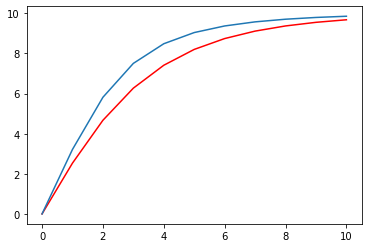

In [43]:
plt.plot(p_sim,'r')
plt.plot(p_old)
plt.show()

In [44]:
def dydt_p(t,y,prm):
    
    # parameters 
    k1  = prm[0]
    k_1 = prm[1]
    k2  = prm[2]
    k3  = prm[3]
    k_3 = prm[4]
    k4  = prm[5]

    # variables
    s = y[0]
    e = y[1]
    c1 = y[2] 
    c2 = y[3] 
    p = y[4] 
    
    #fluxes
    J1 = k1*s*e
    J_1 = k_1*c1
    J2 = k2*c1
    J3 = k3*s*c1
    J_3 = k_3*c2
    J4 = k4*c2

    dydt = np.zeros(5)
    dydt[0] = -J1 + J_1 - J3 + J_3 #S
    dydt[1] = -J1 + J_1 + J2 #E
    dydt[2] = J1 - J_1 - J2 - J3 + J_3 + J4 #C1
    dydt[3] = J3 - J_3 - J4 #C2
    dydt[4] = J2 + J4 #P

    return dydt

In [45]:
# Parameters
#               k1   k-1  k2    k3    k-3   k4
prm = np.array([2.0, 10.0, 5.0, 4.0, 20.0, 10.0])

In [46]:
dydt = lambda t, y: dydt_p(t,y,prm)

In [47]:
# Initial conditions (uM)
S0 = 10.0
E0 = 0.5
C10 = 0.0
C20 = 0.0
P0 = 0.0

y0 = np.array([S0,E0,C10,C20,P0])

In [48]:
t_eval = np.linspace(0,10,11)
solution_object_at_eval = solve_ivp(fun=dydt,t_span=[0,10],t_eval=t_eval,y0=y0)

In [49]:
t_eval

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [50]:
#note: dense output lets us choose how fine to plot the solution 
solution_object = solve_ivp(fun=dydt,t_span=[0,10],t_eval=t_eval,y0=y0,dense_output=True)
sol = solution_object.sol

In [51]:
sol_y = solution_object_at_eval.y
p_sim = sol_y[4,:]

In [52]:
np.round(p_sim + np.random.normal(0,0.2,11),2)

array([0.07, 2.52, 4.85, 6.3 , 6.96, 8.25, 8.43, 8.97, 9.36, 9.5 , 9.62])

In [53]:
p_data = np.array([ 0.0,  4.12,  7.31,  9.2 ,  9.67, 10.03,  9.83,  9.86,  9.9 ,
        9.77, 10.18])

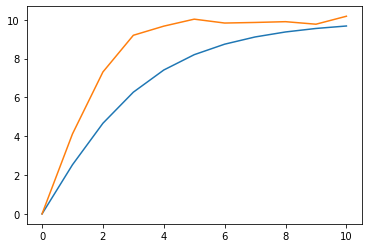

In [54]:
plt.plot(p_sim)
plt.plot(p_data)
plt.show()

In [55]:
t_sol = np.linspace(0,7,100000)
y_sol = sol(t_sol)

In [56]:
y_sol.shape

(5, 100000)

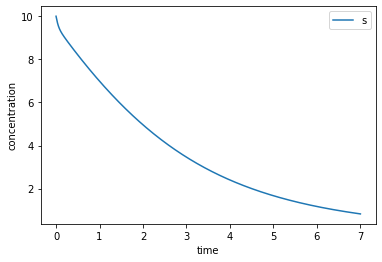

In [57]:
plt.plot(t_sol,y_sol[0,:],label='s')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

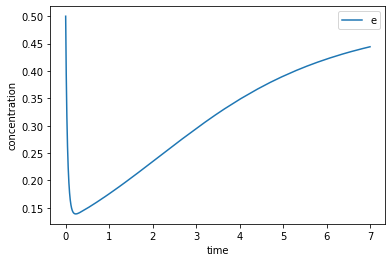

In [58]:
plt.plot(t_sol,y_sol[1,:],label='e')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

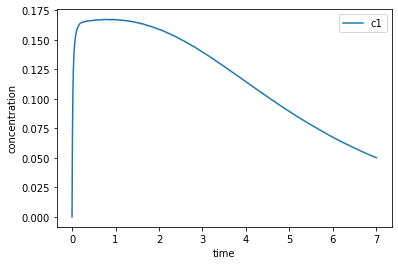

In [59]:
plt.plot(t_sol,y_sol[2,:],label='c1')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

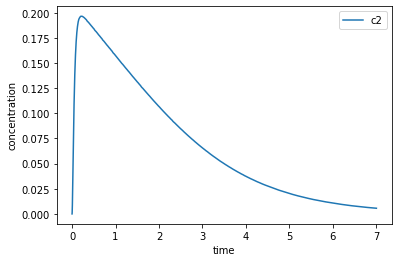

In [60]:
plt.plot(t_sol,y_sol[3,:],label='c2')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

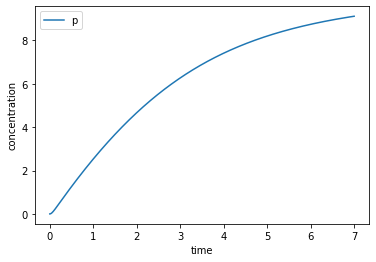

In [61]:
plt.plot(t_sol,y_sol[4,:],label='p')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

In [62]:
y_sol.shape

(5, 100000)

In [63]:
s = y_sol[0,:]
e = y_sol[1,:]
c1 = y_sol[2,:] 
c2 = y_sol[3,:]
p = y_sol[4,:] 

In [64]:
y_sol

array([[1.00000000e+01, 9.99929977e+00, 9.99859911e+00, ...,
        8.25401308e-01, 8.25381381e-01, 8.25361455e-01],
       [5.00000000e-01, 4.99300874e-01, 4.98603505e-01, ...,
        4.44215553e-01, 4.44216890e-01, 4.44218227e-01],
       [0.00000000e+00, 6.98148508e-04, 1.39259417e-03, ...,
        5.01421960e-02, 5.01410937e-02, 5.01399915e-02],
       [0.00000000e+00, 9.77553779e-07, 3.90038266e-06, ...,
        5.64225077e-03, 5.64201594e-03, 5.64178105e-03],
       [0.00000000e+00, 1.22513763e-07, 4.90099331e-07, ...,
        9.11317199e+00, 9.11319349e+00, 9.11321499e+00]])

In [65]:
def objective(k3):
    P_data = np.array([0.00, 4.12, 7.31, 9.20 , 9.67, 10.03, 9.83,  \
                       9.86,  9.90 , 9.77, 10.18]) 
    t_data = np.linspace(0,10,11)
    prm[3] = k3
    dydt = lambda t, y: dydt_p(t,y,prm)
    sol = solve_ivp(fun=dydt,t_span=[0,10],t_eval=t_data,y0=y0)
    P_sim = sol.y[4,:] 
    return np.linalg.norm(P_sim-P_data,2)**2

In [66]:
obj = np.zeros(100)
k3_grid = np.linspace(20,100,100)
for i,k3i in enumerate(k3_grid):
    obj[i] = objective(k3i)

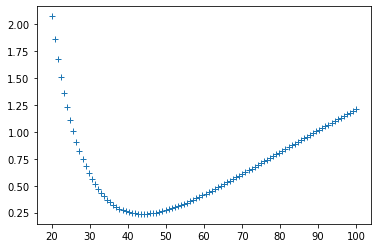

In [67]:
plt.plot(k3_grid,obj,'+')
plt.show()

In [68]:
from scipy.optimize import minimize
k3_initial_guess = 1
res = minimize(objective, x0=k3_initial_guess,tol=1e-3)

In [69]:
res

      fun: 0.23822444162224
 hess_inv: array([[293.19842381]])
      jac: array([0.00067176])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([44.06556173])

In [70]:
from scipy.optimize import linprog

c = -np.array([0,1,0,0,0,0])

S = np.array([[1,-1, 0, 0, 0, 0],
[0, 1 , -1 , 0 , 0 , 0],
[-1 , 0 , 0 , 0 , 1 , 0],
[1 , -3 , 0 , 1 , 0 , -2]])

b_eq = np.zeros(4)

bounds = np.array(list(zip(np.repeat(0,6),np.repeat(15,6))))

res = linprog(c=c, A_ub = None , b_ub=None, A_eq =S, b_eq = b_eq, bounds=bounds) 

In [71]:
res

     con: array([0., 0., 0., 0.])
     fun: -7.5
 message: 'Optimization terminated successfully.'
     nit: 12
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 7.5,  7.5,  7.5, 15. ,  7.5,  0. ])